<a href="https://colab.research.google.com/github/desakim/ESAA_OB/blob/main/desakim_ob1117_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

기한: 11월 20일 (월) 18:30

파이썬 딥러닝 텐서플로 ch3.1~3

pg. 50 ~ 86 필사하여 깃허브에 업로드한 뒤, 깃허브 링크를 댓글로 달아주세요.

# Chap 3.1

In [ ]:
import tensorflow as tf
tf.keras.losses.BinaryCrossentropy()
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

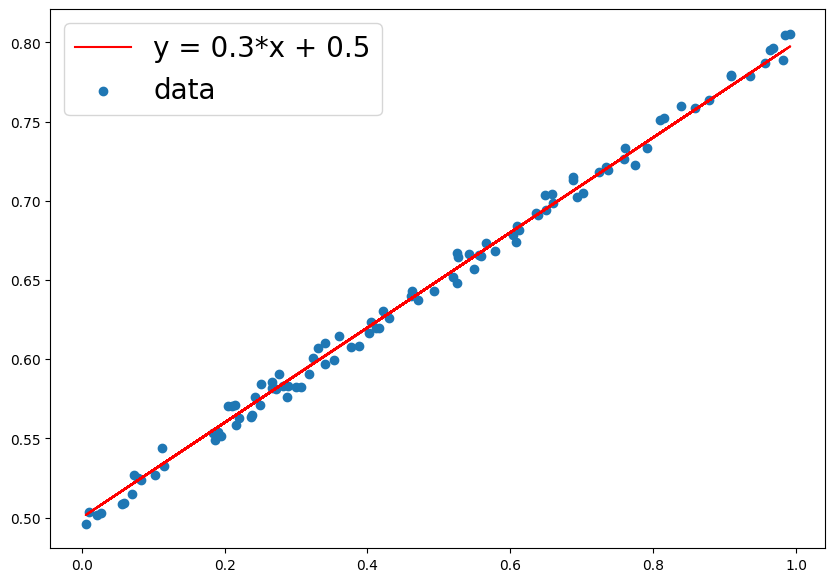

w:0.3,b:0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5,b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y = {w}*x + {b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w},b:{b}')
  return x,yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch,w,b,error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch,w,b,error))

 0 w = 0.59276, b = 0.26975 error = 2.83836
 5 w = 0.58057, b = 0.36028 error = 0.30565
10 w = 0.54160, b = 0.38030 error = 0.22491
15 w = 0.50795, b = 0.39698 error = 0.16570
20 w = 0.47909, b = 0.41127 error = 0.12218
25 w = 0.45436, b = 0.42352 error = 0.09020
30 w = 0.43315, b = 0.43403 error = 0.06669
35 w = 0.41498, b = 0.44303 error = 0.04942
40 w = 0.39939, b = 0.45075 error = 0.03672
45 w = 0.38603, b = 0.45737 error = 0.02739
50 w = 0.37458, b = 0.46305 error = 0.02053
55 w = 0.36476, b = 0.46791 error = 0.01549
60 w = 0.35634, b = 0.47208 error = 0.01179
65 w = 0.34913, b = 0.47566 error = 0.00907
70 w = 0.34294, b = 0.47872 error = 0.00707
75 w = 0.33764, b = 0.48135 error = 0.00560
------------------------------------------------------------
78 w = 0.3, b = 0.5 error = 0.00491


# 02. 단순 신경망 훈련

2-1 선형회귀

- 단순선형회귀 : 하나의 X 가 Y에 미치는 영향 추정. 1차 함수 관계

    y = wx +b  -> w : 가중치, b: 편향

2-2 뉴련

여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성. 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치 업데이트.

2-3 Dense 레이어

Dense 레이어는 심층 신경망 모델을 구성하는 가장 기본 레이어. 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에 완전 연결층이라고 부르기도 함.



In [ ]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLu 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

In [ ]:
x = np.arange(1,6)
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


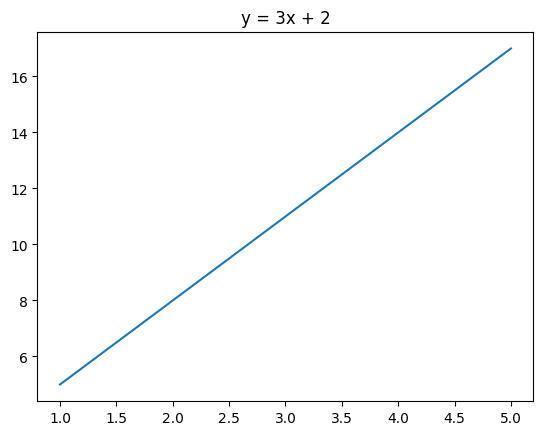

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

2-5 Sequential API

층을 이어붙이듯 시퀀스에 맞게 일렬로 연결하는 방식. 입력 레이어부터 출력 레이어까지 순서를 갖음.

입력 데이터는 시퀀스의 가장 앞에 위치한 층에 출력되고 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산을 수행

In [ ]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
        ])


In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
  # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정
  tf.keras.layers.Dense(10, input_shape=[4]),
  tf.keras.layers.Dense(5),
  tf.keras.layers.Dense(1)
])


In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 바이어스는 디폴트가 true

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
              ])

In [ ]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

In [ ]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 507ms/step - loss: 86.1636 - mae: 8.7244
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 50.3345 - mae: 6.7105
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 29.4542 - mae: 5.1730
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 17.2854 - mae: 3.9992
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.1932 - mae: 3.1029


In [ ]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 472ms/step - loss: 302.2199 - mae: 16.0696
Epoch 2/1200
1/1 [==============================] - 0s 10ms/step - loss: 176.1504 - mae: 12.2929
Epoch 3/1200
1/1 [==============================] - 0s 10ms/step - loss: 102.6832 - mae: 9.4097
Epoch 4/1200
1/1 [==============================] - 0s 10ms/step - loss: 59.8699 - mae: 7.2087
Epoch 5/1200
1/1 [==============================] - 0s 11ms/step - loss: 34.9203 - mae: 5.5284
Epoch 6/1200
1/1 [==============================] - 0s 9ms/step - loss: 20.3806 - mae: 4.2456
Epoch 7/1200
1/1 [==============================] - 0s 9ms/step - loss: 11.9074 - mae: 3.2662
Epoch 8/1200
1/1 [==============================] - 0s 10ms/step - loss: 6.9695 - mae: 2.5185
Epoch 9/1200
1/1 [==============================] - 0s 12ms/step - loss: 4.0917 - mae: 1.9477
Epoch 10/1200
1/1 [==============================] - 0s 9ms/step - loss: 2.4144 - mae: 1.5118
Epoch 11/1200
1/1 [==============================

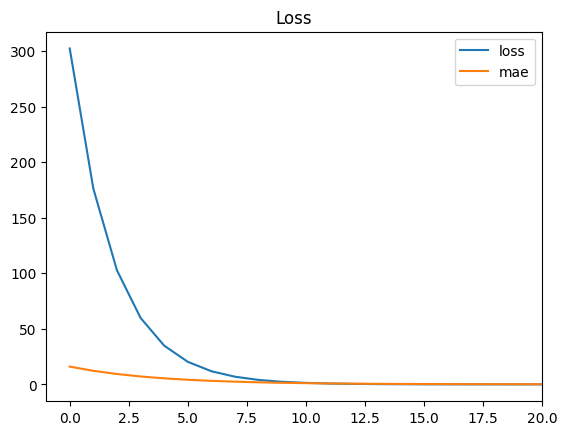

In [ ]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x,y)

1/1 [==============================] - 0s 462ms/step - loss: 2.2769e-05 - mae: 0.0041


[2.2768752387491986e-05, 0.004095554351806641]

In [ ]:
model.predict([10])

1/1 [==============================] - 0s 150ms/step


array([[32.019794]], dtype=float32)

In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [ ]:
# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


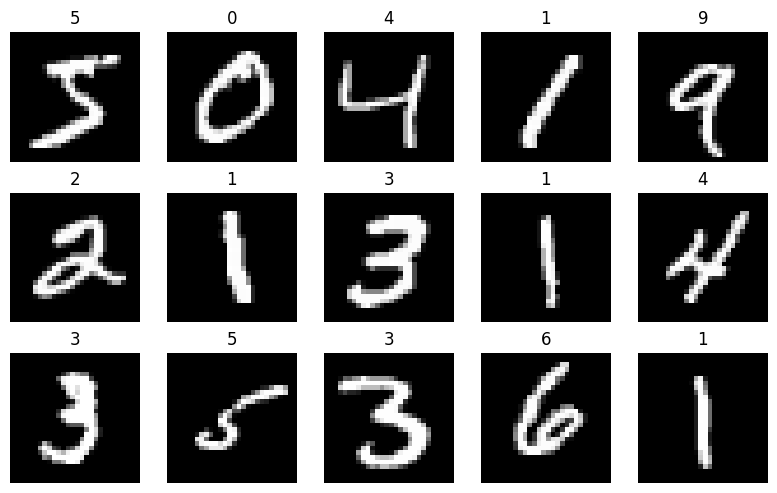

In [ ]:
## 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

In [ ]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [ ]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [ ]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [ ]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [ ]:
print(f'변경 전 shape:{x_train.shape}')
print(f'ID으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape:(60000, 28, 28)
ID으로 shape 변경 후: (60000, 784)


In [ ]:
# 다차원 데이터를 1차원으로 펼쳐주는 방법
print(f'변경 전 shape:{x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후:{tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)
Flatten 적용 후:(60000, 784)


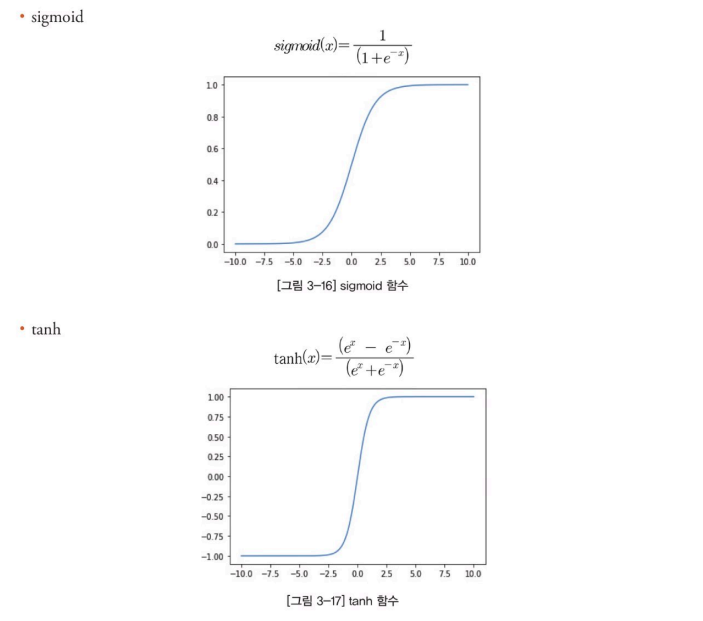

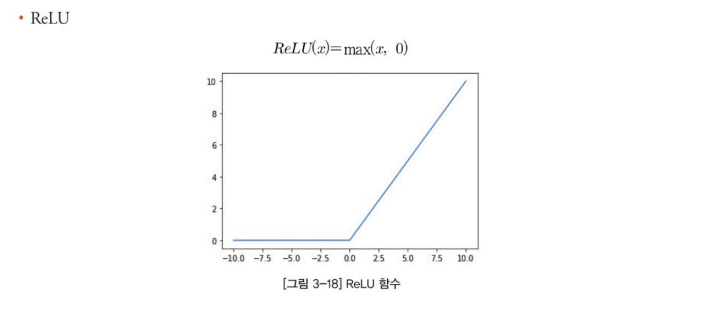

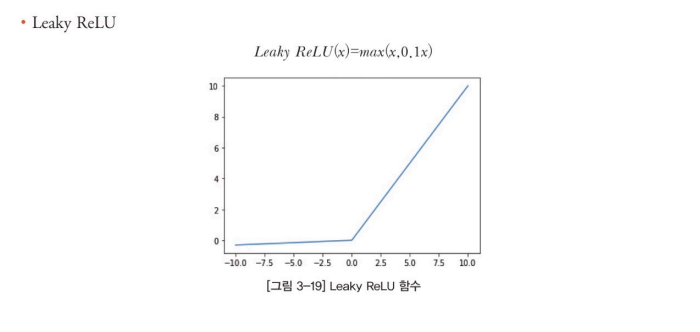

In [ ]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [ ]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

3-5 입력과 출력



In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        # 노드 = 10개(클래스 개수와 동일) = 마지막 출력층의 노드 개수
        tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax  -> 다중 분류 문제
tf.keras.layers.Dense(10, activation='softmax')

3.6 손실함수 -> 출력층에 따라 올바른 손실함수 설정.

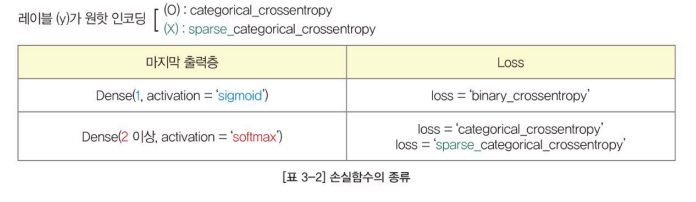

In [ ]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [ ]:
# y가 원핫 벡터인 경우
# [0.,0.,0.,0.,0.,1.,0.,0.,0.,0.]
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

3.7 옵티마이저

: 손실 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법. 일반적으로 많이 사용되는 알고리즘은 Adam 이며 대체적으로 좋은 성능을 가짐

- 케라스 지원 옵티마이저

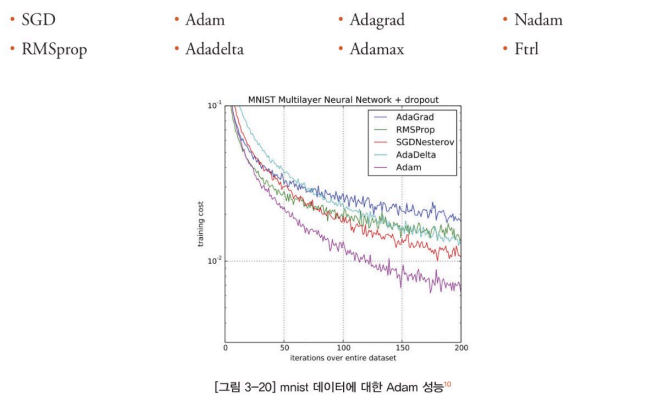

In [ ]:
# 클래스 인스턴스로 지정 : 문자열과는 다르게 하이퍼파라미터 직접 설정 가능
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정 : 클래스 이름을 소문자로
model.compile(optimizer='adam')

In [ ]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [ ]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2300 - accuracy: 0.9308 - val_loss: 0.1054 - val_accuracy: 0.9671
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0944 - accuracy: 0.9708 - val_loss: 0.0911 - val_accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0662 - accuracy: 0.9788 - val_loss: 0.0816 - val_accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0490 - accuracy: 0.9844 - val_loss: 0.0797 - val_accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0413 - accuracy: 0.9868 - val_loss: 0.0871 - val_accuracy: 0.9748
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.0867 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0867 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test) # evaluate() : 손실과 정확도를 순서대로 반환.

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.9806
검증 셋 정확도: 0.9805999994277954


In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# 예측 결과 출력
predictions[0]

array([5.9053201e-10, 1.1558804e-07, 5.4461977e-09, 1.9297993e-08,
       5.4142203e-07, 4.8009180e-10, 9.0062454e-12, 9.9999887e-01,
       2.8638418e-09, 3.1535239e-07], dtype=float32)

In [ ]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


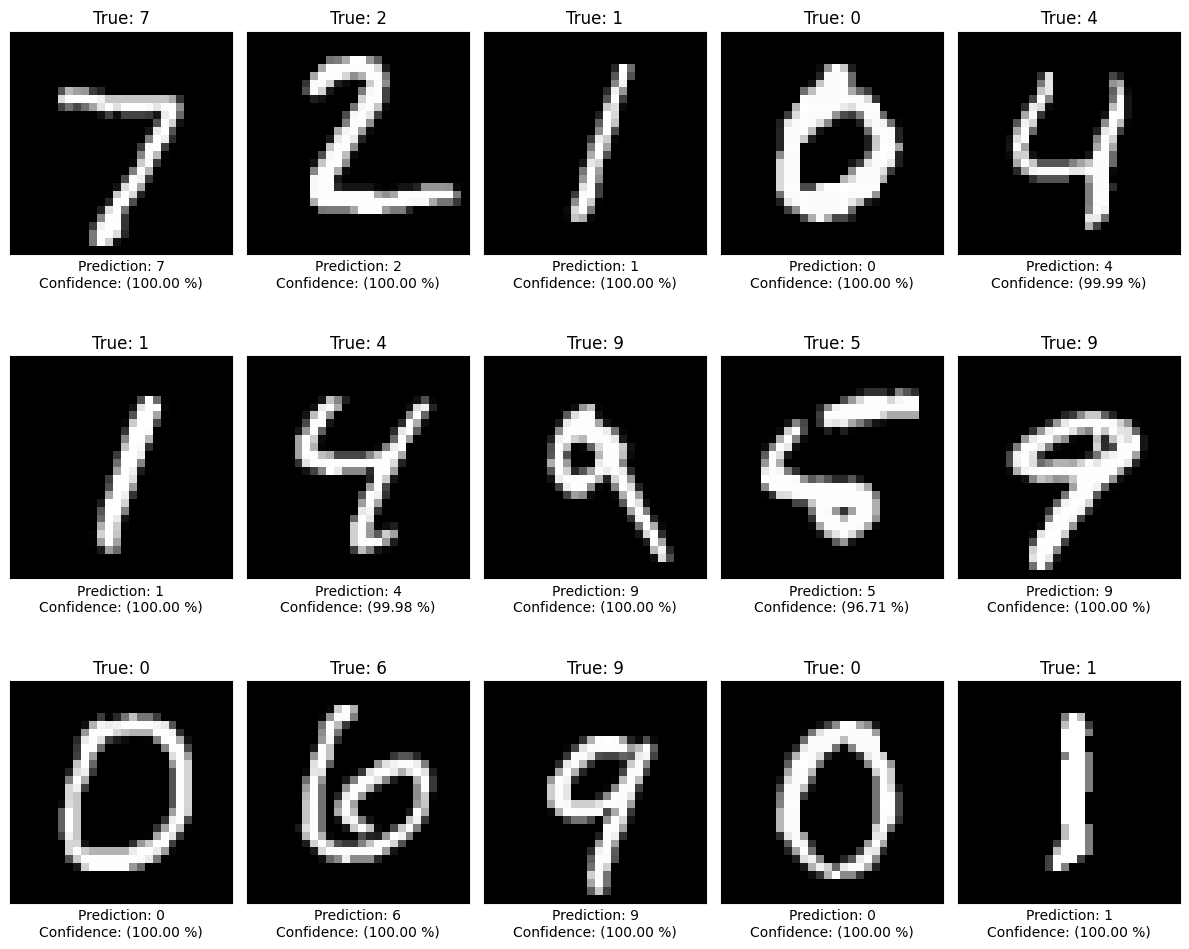

In [ ]:
## 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()